In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

#### Helper

In [2]:
def print_grid_cv_results(grid_result):
    print(
        f"Best model score: {grid_result.best_score_} "
        f"Best model params: {grid_result.best_params_} "
    )
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    params = grid_result.cv_results_["params"]

    for mean, std, param in zip(means, stds, params):
        mean = round(mean, 4)
        std = round(std, 4)
        print(f"{mean} (+/- {2 * std}) with: {param}")

#### LOAD DATASET

In [3]:
cal_housing = fetch_california_housing()

x = cal_housing.data
y = cal_housing.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### NORMALIZE DATASET

In [4]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### Metrics

In [5]:
scoring_metrics = {
    'r2_score': make_scorer(r2_score)
}

#### LINEAR REGRESSION:

In [6]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
cv_results = cross_validate(
    regr, x_train, y_train, cv=3, scoring=scoring_metrics
)
test_r2_score = cv_results['test_r2_score']

print(f"Mean R2: {np.mean(test_r2_score)}")

Mean R2: 0.6075224720706819


#### KNN REGRSSOR

In [7]:
from sklearn.neighbors import KNeighborsRegressor

params = {
    "n_neighbors": [i for i in range(2, 24, 2)],
    "weights": ["uniform", "distance"]
}

regr = KNeighborsRegressor()

grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best model score: 0.6836115816373965 Best model params: {'n_neighbors': 14, 'weights': 'distance'} 
0.613 (+/- 0.0122) with: {'n_neighbors': 2, 'weights': 'uniform'}
0.6147 (+/- 0.0124) with: {'n_neighbors': 2, 'weights': 'distance'}
0.6609 (+/- 0.0078) with: {'n_neighbors': 4, 'weights': 'uniform'}
0.664 (+/- 0.0082) with: {'n_neighbors': 4, 'weights': 'distance'}
0.6717 (+/- 0.0024) with: {'n_neighbors': 6, 'weights': 'uniform'}
0.6759 (+/- 0.0028) with: {'n_neighbors': 6, 'weights': 'distance'}
0.6742 (+/- 0.0058) with: {'n_neighbors': 8, 'weights': 'uniform'}
0.6791 (+/- 0.0052) with: {'n_neighbors': 8, 'weights': 'distance'}
0.6774 (+/- 0.0062) with: {'n_neighbors': 10, 'weights': 'uniform'}
0.6824 (+/- 0.0054) with: {'n_neighbors': 10, 'weights': 'distance'}
0.6784 (+/- 0.0068) with: {'n_neighbors': 12, 'weights': 'uniform'}
0.6836 (+/- 0.0056) with: {'n_neighbors': 12, 'weights': 'distance'}
0.6782 (+/- 0.0064) with: {'n_neighbors': 14, 'weights': 'uniform'}
0.6836 (+/- 0.0054) 

#### RANDOM FOREST REGRESSOR

In [8]:
from sklearn.ensemble import RandomForestRegressor

params = {
    "n_estimators": [50*i for i in range(4, 10)],
    "max_depth": [i for i in range(20, 51, 10)] + [None]
}

regr = RandomForestRegressor()

grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

#### GRADIENT BOOSTING REGRESSOR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": [50*i for i in range(4, 10)],
    "max_depth": [i for i in range(20, 51, 10)] + [None]
}

regr = GradientBoostingRegressor()

grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best model score: 0.6490966673085837 Best model params: {'max_depth': 20, 'n_estimators': 300} 
0.6478 (+/- 0.0224) with: {'max_depth': 20, 'n_estimators': 200}
0.6488 (+/- 0.0254) with: {'max_depth': 20, 'n_estimators': 250}
0.6491 (+/- 0.0244) with: {'max_depth': 20, 'n_estimators': 300}
0.6489 (+/- 0.0234) with: {'max_depth': 20, 'n_estimators': 350}
0.6483 (+/- 0.022) with: {'max_depth': 20, 'n_estimators': 400}
0.6465 (+/- 0.0242) with: {'max_depth': 20, 'n_estimators': 450}
0.6084 (+/- 0.0368) with: {'max_depth': 30, 'n_estimators': 200}
0.6083 (+/- 0.0374) with: {'max_depth': 30, 'n_estimators': 250}
0.6084 (+/- 0.037) with: {'max_depth': 30, 'n_estimators': 300}
0.6088 (+/- 0.0356) with: {'max_depth': 30, 'n_estimators': 350}
0.6089 (+/- 0.0364) with: {'max_depth': 30, 'n_estimators': 400}
0.6099 (+/- 0.036) with: {'max_depth': 30, 'n_estimators': 450}
0.6083 (+/- 0.0388) with: {'max_depth': 40, 'n_estimators': 200}
0.6087 (+/- 0.0358) with: {'max_depth': 40, 'n_estimators': 25

#### SVM REGRESSOR:

In [ ]:
from sklearn.svm import SVR

params = {
    "kernel": ["linear", "sigmoid", "rbf", "poly"]
}

regr = SVR()

grid = GridSearchCV(regr, params, cv=3, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best model score: 0.7275190171474754 Best model params: {'kernel': 'rbf'} 
-1.5376 (+/- 6.0066) with: {'kernel': 'linear'}
-4294.631 (+/- 1709.0764) with: {'kernel': 'sigmoid'}
0.7275 (+/- 0.0108) with: {'kernel': 'rbf'}
-2945.7243 (+/- 8261.0024) with: {'kernel': 'poly'}


#### BEST MODEL:

In [ ]:
best_params = {'max_depth': 50, 'n_estimators': 400} 
best_regressor = RandomForestRegressor

regr = best_regressor(**best_params)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 0.2539344596366583
MAE: 0.33027872972787503
R2: 0.806532038049789


#### Residual Plot of Best Model

In [ ]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)
    
    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))
    
    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue", s=10)
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red", s=10)
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

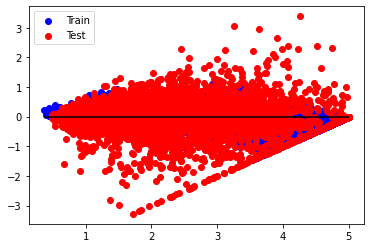

In [ ]:
plot_residuals(regr, x_train, y_train, x_test, y_test)